# Computer Lab 6: Modeled Precipitation Data
Climate Data Analysis, ATS 301, Fall 2018					

As before, we start by specifing that we want plots to be displayed inside the Jupyter Notebook, and load the modules we'll need.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# xarray is a module that will allow us to store and use the data.
import xarray as xr

## Read in and examine the contents of the data file

Read in the data as an `xarray DataSet`, called `ds` (short for "data set"). You could call this anything you wanted to (within reason) though.

In [3]:
ds = xr.open_dataset('/data/ATS_301/Data/pr_Amon_GISS-E2-H_rcp85_r1i1p1_200601-205012.nc')

Take a look at what's in this dataset.

In [4]:
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 540)
Coordinates:
  * time       (time) datetime64[ns] 2006-01-16T12:00:00 2006-02-15 ...
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...
  * lon        (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes:
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          rcp85
    source:                 GISS-E2-H-Eh135RCP85a Atmosphere: GISS-E2; Ocean: H
    model_id:               GISS-E2-H
    forcing:                GHG, LU, Sl, Vl, BC, OC, SA, Oz (also includes or...
    parent_experiment_id:   historical
    parent_experiment_rip:  r1i1p1
    branch_time:            2006

Some of the **attributes** provide useful information about this model run.

To look at a **variable** or **coordinate** within this dataset, we add a dot ('.') and the name of the variable after the dataset name.

There are latitude, longitude, and time **dimensions**. Let's look at the values in them to get an idea of the model's **resolution**. How far apart are the latitudes and longitudes? What time-averaging has already been done on the data?

In [5]:
ds.lat

<xarray.DataArray 'lat' (lat: 90)>
array([-89., -87., -85., -83., -81., -79., -77., -75., -73., -71., -69., -67.,
       -65., -63., -61., -59., -57., -55., -53., -51., -49., -47., -45., -43.,
       -41., -39., -37., -35., -33., -31., -29., -27., -25., -23., -21., -19.,
       -17., -15., -13., -11.,  -9.,  -7.,  -5.,  -3.,  -1.,   1.,   3.,   5.,
         7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,  25.,  27.,  29.,
        31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.,  49.,  51.,  53.,
        55.,  57.,  59.,  61.,  63.,  65.,  67.,  69.,  71.,  73.,  75.,  77.,
        79.,  81.,  83.,  85.,  87.,  89.])
Coordinates:
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...
Attributes:
    bounds:         lat_bnds
    units:          degrees_north
    axis:           Y
    long_name:      latitude
    standard_name:  latitude

In [6]:
ds.lon

<xarray.DataArray 'lon' (lon: 144)>
array([  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,  21.25,
        23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,  41.25,  43.75,
        46.25,  48.75,  51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,
        68.75,  71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,  88.75,
        91.25,  93.75,  96.25,  98.75, 101.25, 103.75, 106.25, 108.75, 111.25,
       113.75, 116.25, 118.75, 121.25, 123.75, 126.25, 128.75, 131.25, 133.75,
       136.25, 138.75, 141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25,
       158.75, 161.25, 163.75, 166.25, 168.75, 171.25, 173.75, 176.25, 178.75,
       181.25, 183.75, 186.25, 188.75, 191.25, 193.75, 196.25, 198.75, 201.25,
       203.75, 206.25, 208.75, 211.25, 213.75, 216.25, 218.75, 221.25, 223.75,
       226.25, 228.75, 231.25, 233.75, 236.25, 238.75, 241.25, 243.75, 246.25,
       248.75, 251.25, 253.75, 256.25, 258.75, 261.25, 263.75, 266.25, 268.75,
       271.25, 2

In [7]:
ds.time

<xarray.DataArray 'time' (time: 540)>
array(['2006-01-16T12:00:00.000000000', '2006-02-15T00:00:00.000000000',
       '2006-03-16T12:00:00.000000000', ..., '2050-10-16T12:00:00.000000000',
       '2050-11-16T00:00:00.000000000', '2050-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2006-01-16T12:00:00 2006-02-15 ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

The variable we're interested in is precipitation:

In [8]:
ds.pr

<xarray.DataArray 'pr' (time: 540, lat: 90, lon: 144)>
[6998400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2006-01-16T12:00:00 2006-02-15 ...
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 ...
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    comment:           at surface; includes both liquid and solid phases from...
    units:             kg m-2 s-1
    original_name:     dummy
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-08-10T12:25:03Z altered by CMOR: replaced missing...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

Depending on the varible, using `ds.` followed by the variable name will output all, some, or none of the data (array). To force it to output (at least some) of the values, add `.values` to the end. This will show at least the first 3 and last 3 of each array index.

In [9]:
ds.pr.values

array([[[5.8141376e-07, 5.8141376e-07, 5.8141376e-07, ...,
         5.8141376e-07, 5.8141376e-07, 5.8141376e-07],
        [9.6406347e-07, 9.5443011e-07, 1.0161270e-06, ...,
         8.8084573e-07, 9.0355240e-07, 9.4005759e-07],
        [1.0588971e-06, 8.0326123e-07, 6.4789850e-07, ...,
         1.3781518e-06, 1.2383625e-06, 1.1776897e-06],
        ...,
        [3.8794096e-06, 3.9056386e-06, 3.8463254e-06, ...,
         3.7070599e-06, 3.6060922e-06, 3.8133649e-06],
        [3.0478791e-06, 3.1447516e-06, 3.2538771e-06, ...,
         2.8028885e-06, 2.8566499e-06, 2.9435903e-06],
        [2.4110848e-06, 2.4110848e-06, 2.4110848e-06, ...,
         2.4110848e-06, 2.4110848e-06, 2.4110848e-06]],

       [[9.1854355e-07, 9.1854355e-07, 9.1854355e-07, ...,
         9.1854355e-07, 9.1854355e-07, 9.1854355e-07],
        [3.1697375e-06, 3.1380903e-06, 3.1453080e-06, ...,
         3.8675917e-06, 3.4927145e-06, 3.2209850e-06],
        [6.0108864e-06, 5.2009214e-06, 4.6070090e-06, ...,
         8.188

Note that this variable it too large to write it all out.


## Plotting 2-D data using Cartopy

We'd like to plot some of the data to visualize it.  The `.plot()` function is a special function from `xarray`. It uses the **metadata** within the dataset to label axes, add a colorbar and title, and make a guess at what colors to use.

In general, we've been using **functions** that come before the variables we're passing to them.  (For example, `plt.plot(var_name)`.) However, sometimes the function needs to follow the variable. (This is technically called a **method**, but I'll use the word **function** for simplicity.) The xarray functions are ones that need to follow the variable.  The syntax is a little different:

`dataset.variable.plot()`

So try:

(array([6.916864e+06, 7.757700e+04, 3.016000e+03, 5.780000e+02,
        2.180000e+02, 9.800000e+01, 3.100000e+01, 1.500000e+01,
        2.000000e+00, 1.000000e+00]),
 array([6.2568596e-11, 1.7717227e-04, 3.5434449e-04, 5.3151674e-04,
        7.0868892e-04, 8.8586117e-04, 1.0630334e-03, 1.2402056e-03,
        1.4173778e-03, 1.5945500e-03, 1.7717222e-03], dtype=float32),
 <a list of 10 Patch objects>)

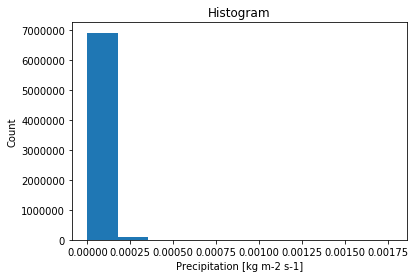

In [10]:
ds.pr.plot()

Hm. We'll that's interesting, but what I really wanted was to look at a **map (lat-lon) plot**.  Since this data is 3-D, the xarray.plot function automatically created a **histogram** plot. 

In [11]:
help(xr.plot)

Help on package xarray.plot in xarray:

NAME
    xarray.plot

PACKAGE CONTENTS
    facetgrid
    plot
    utils

CLASSES
    builtins.object
        xarray.plot.facetgrid.FacetGrid
    
    class FacetGrid(builtins.object)
     |  Initialize the matplotlib figure and FacetGrid object.
     |  
     |  The :class:`FacetGrid` is an object that links a xarray DataArray to
     |  a matplotlib figure with a particular structure.
     |  
     |  In particular, :class:`FacetGrid` is used to draw plots with multiple
     |  Axes where each Axes shows the same relationship conditioned on
     |  different levels of some dimension. It's possible to condition on up to
     |  two variables by assigning variables to the rows and columns of the
     |  grid.
     |  
     |  The general approach to plotting here is called "small multiples",
     |  where the same kind of plot is repeated multiple times, and the
     |  specific use of small multiples to display the same relationship
     |  condi

In [12]:
help(xr.plot.plot)

Help on function plot in module xarray.plot.plot:

plot(darray, row=None, col=None, col_wrap=None, ax=None, hue=None, rtol=0.01, subplot_kws=None, **kwargs)
    Default plot of DataArray using matplotlib.pyplot.
    
    Calls xarray plotting function based on the dimensions of
    darray.squeeze()
    
    =============== ===========================
    Dimensions      Plotting function
    --------------- ---------------------------
    1               :py:func:`xarray.plot.line`
    2               :py:func:`xarray.plot.pcolormesh`
    Anything else   :py:func:`xarray.plot.hist`
    =============== ===========================
    
    Parameters
    ----------
    darray : DataArray
    row : string, optional
        If passed, make row faceted plots on this dimension name
    col : string, optional
        If passed, make column faceted plots on this dimension name
    hue : string, optional
        If passed, make faceted line plots with hue on this dimension name
    col_wrap : i

To do a **lat-lon plot**, we need to use 2-D data (which will result in a `pcolormesh` plot).  So let's just pick the first time (month) to examine. We use array subscripting to do this:

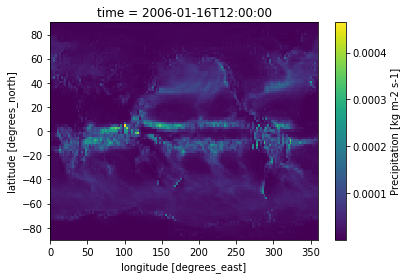

In [13]:
ds.pr[0,:,:].plot()

What does the "0" indicate?  What do the two ":"'s indicate?

We can do a little better using the `cartopy` module.


In [14]:
import cartopy.crs as ccrs

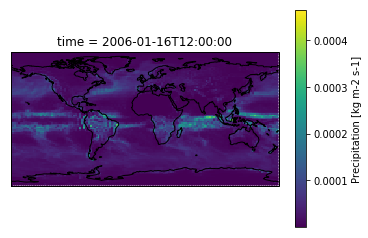

In [15]:
ax = plt.axes(projection=ccrs.PlateCarree())
ds.pr[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines() # Cartopy can add coastlines to a plot.

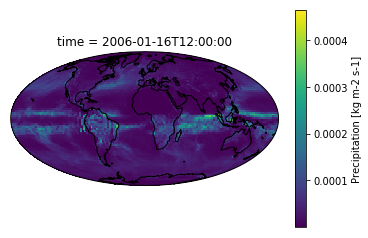

In [16]:
# Use a different projection.

ax = plt.axes(projection=ccrs.Mollweide())
ds.pr[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

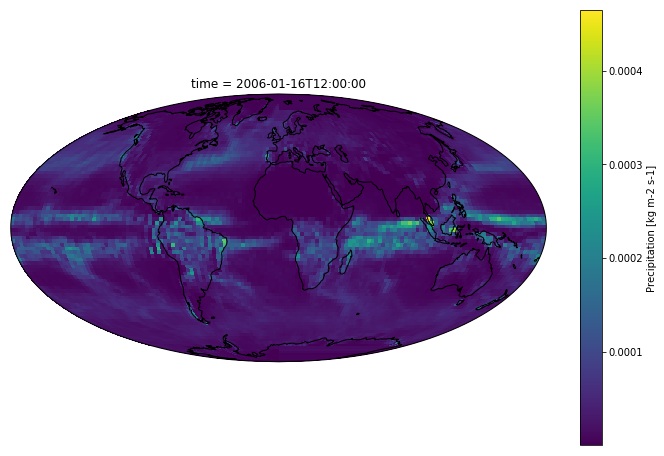

In [17]:
# Make the figure bigger
plt.figure(figsize=[12,8])

ax = plt.axes(projection=ccrs.Mollweide())
ds.pr[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

The `cmap='Blues'` option specifies the blue-white colormap.  `cbar_kwargs={'shrink':0.4}` shrinks the colorbar by 0.4.

Text(0.5,1,'Jan 2006 Precipitation (units here!)')

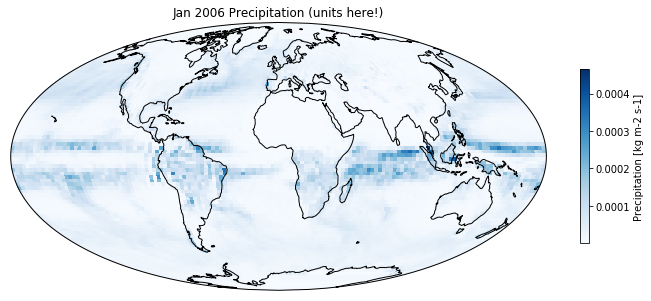

In [18]:
# Make the figure bigger
plt.figure(figsize=[12,8])

ax = plt.axes(projection=ccrs.Mollweide())
ds.pr[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(),\
                  cmap='Blues',cbar_kwargs={'shrink':0.4})
ax.coastlines()

# Make the title more useful
plt.title('Jan 2006 Precipitation (units here!)')

See this page for a list of different colormaps you can use:

http://matplotlib.org/examples/color/colormaps_reference.html


For a list of the different projections:

http://scitools.org.uk/cartopy/docs/latest/crs/projections.html

## Means in Xarray

We've been working with precip data from one particular time (month). Often, we want to work with the average (more precisely, the mean) over 1, 2, or even 3 dimensions.

If we are averaging over 2 (or more dimensions), does it matter which dimension we average first?

Let's start by averaging over the time dimension. This will give us the **time-mean**.

What happens when we just use the `mean` function w/o specifying any options?

In [19]:
np.mean(ds.pr)

<xarray.DataArray 'pr' ()>
array(3.085986e-05, dtype=float32)

In [21]:
ds.pr




<xarray.DataArray 'pr' (time: 540, lat: 90, lon: 144)>
array([[[5.814138e-07, 5.814138e-07, ..., 5.814138e-07, 5.814138e-07],
        [9.640635e-07, 9.544301e-07, ..., 9.035524e-07, 9.400576e-07],
        ...,
        [3.047879e-06, 3.144752e-06, ..., 2.856650e-06, 2.943590e-06],
        [2.411085e-06, 2.411085e-06, ..., 2.411085e-06, 2.411085e-06]],

       [[9.185435e-07, 9.185435e-07, ..., 9.185435e-07, 9.185435e-07],
        [3.169738e-06, 3.138090e-06, ..., 3.492715e-06, 3.220985e-06],
        ...,
        [1.038228e-05, 1.024401e-05, ..., 1.212388e-05, 1.142260e-05],
        [2.353960e-06, 2.353960e-06, ..., 2.353960e-06, 2.353960e-06]],

       ...,

       [[2.709446e-07, 2.709446e-07, ..., 2.709446e-07, 2.709446e-07],
        [6.018747e-07, 6.546893e-07, ..., 6.212762e-07, 5.565449e-07],
        ...,
        [1.017057e-05, 1.010204e-05, ..., 1.046535e-05, 1.020507e-05],
        [1.007643e-05, 1.007643e-05, ..., 1.007643e-05, 1.007643e-05]],

       [[1.609915e-06, 1.609915e-06

Use the `help` function to figure out what's going on and how to get the mean we want.

In [20]:
help(np.mean)

Help on function mean in module numpy.core.fromnumeric:

mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)
    Compute the arithmetic mean along the specified axis.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the means are computed. The default is to
        compute the mean of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a mean is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the mean.  Fo

In [22]:
time_average_pr=np.mean(ds.pr,axis=0)

In [23]:
time_average_pr

<xarray.DataArray 'pr' (lat: 90, lon: 144)>
array([[9.261371e-07, 9.261371e-07, 9.261371e-07, ..., 9.261371e-07,
        9.261371e-07, 9.261371e-07],
       [1.648482e-06, 1.736469e-06, 1.894223e-06, ..., 1.836713e-06,
        1.739245e-06, 1.634489e-06],
       [2.504199e-06, 2.233672e-06, 2.104658e-06, ..., 3.420329e-06,
        3.125495e-06, 2.786880e-06],
       ...,
       [9.271239e-06, 9.264028e-06, 9.310150e-06, ..., 9.091982e-06,
        9.161936e-06, 9.229244e-06],
       [7.959143e-06, 7.996637e-06, 8.070793e-06, ..., 7.663936e-06,
        7.863886e-06, 7.850020e-06],
       [4.659519e-06, 4.659519e-06, 4.659519e-06, ..., 4.659519e-06,
        4.659519e-06, 4.659519e-06]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 ...

How many dimensions does the new array have?

Xarray allows us to do this in an easier way.  Rather than having to remember which **axis** corresponds to which dimension, we can use the **names** of the **dimensions** themselves. 

To average over a specific dimension, use the `mean(dim='  ')` xarray function. (Note that this function is added after the xarray variable name: `ds.ps`.) 

In [24]:
new_time_average_pr=ds.pr.mean(dim='time')

Now make a lat-lon (map) plot for the time-average precipitation.

Text(0.5,1,'Time-Mean Precipitation (units here!)')

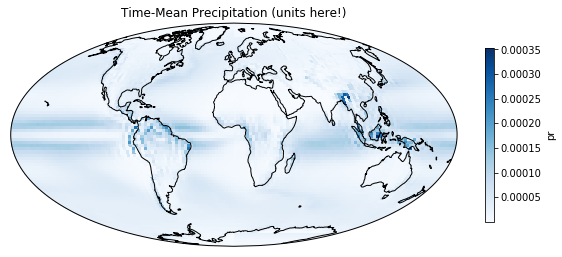

In [25]:
# Your code here.

# Make the figure bigger
plt.figure(figsize=[10,8])

ax = plt.axes(projection=ccrs.Mollweide())
new_time_average_pr.plot(ax=ax, transform=ccrs.PlateCarree(),\
                         cmap='Blues',cbar_kwargs={'shrink':0.4})
ax.coastlines()
plt.title('Time-Mean Precipitation (units here!)')

## Zonal and Global Means

By averaging over longitude (rather than time), we can calculate the time-series of the zonal-mean precip.

In [26]:
zonal_ave=ds.pr.mean(dim='lon')

In [27]:
zonal_ave

<xarray.DataArray 'pr' (time: 540, lat: 90)>
array([[5.814138e-07, 2.109409e-06, 2.925069e-06, ..., 3.678487e-06,
        3.759634e-06, 2.411085e-06],
       [9.185435e-07, 3.119250e-06, 5.295917e-06, ..., 5.060176e-06,
        4.378450e-06, 2.353960e-06],
       [5.089177e-07, 2.864523e-06, 5.445641e-06, ..., 5.143446e-06,
        4.854445e-06, 2.567529e-06],
       ...,
       [4.677623e-07, 2.593283e-06, 5.010510e-06, ..., 1.632674e-05,
        1.574596e-05, 8.695425e-06],
       [2.709446e-07, 2.118015e-06, 3.159622e-06, ..., 8.626854e-06,
        8.217258e-06, 1.007643e-05],
       [1.609915e-06, 4.400061e-06, 5.536986e-06, ..., 9.314622e-06,
        9.205215e-06, 7.396381e-06]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2006-01-16T12:00:00 2006-02-15 ...
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...

 We can take a quick at data from one time to see if it looks as expected, by plotting the zonal average for the first time step.

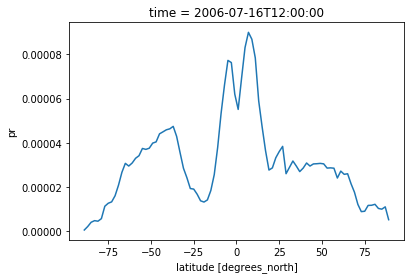

In [32]:
zonal_ave[6,:].plot()

# Alternate way of plotting this:

#plt.plot(ds.lat,zonal_ave[0,:])

For the global mean, we have to be more careful. The area of a latitude band changes with latitude. So we have to take this in to account when calculating the global mean.

We start by creating an array of **weights**. Areas for the different latitudes are approximately proportional to the cos of latitude. The `np.cos` function takes input in radians, so we have to convert the latitude in degrees to the latitude in radians first, using the `np.radians` function.

In [33]:
lat_weight=np.cos(np.radians(ds.lat)) 

In [34]:
lat_weight

<xarray.DataArray 'lat' (lat: 90)>
array([0.017452, 0.052336, 0.087156, 0.121869, 0.156434, 0.190809, 0.224951,
       0.258819, 0.292372, 0.325568, 0.358368, 0.390731, 0.422618, 0.45399 ,
       0.48481 , 0.515038, 0.544639, 0.573576, 0.601815, 0.62932 , 0.656059,
       0.681998, 0.707107, 0.731354, 0.75471 , 0.777146, 0.798636, 0.819152,
       0.838671, 0.857167, 0.87462 , 0.891007, 0.906308, 0.920505, 0.93358 ,
       0.945519, 0.956305, 0.965926, 0.97437 , 0.981627, 0.987688, 0.992546,
       0.996195, 0.99863 , 0.999848, 0.999848, 0.99863 , 0.996195, 0.992546,
       0.987688, 0.981627, 0.97437 , 0.965926, 0.956305, 0.945519, 0.93358 ,
       0.920505, 0.906308, 0.891007, 0.87462 , 0.857167, 0.838671, 0.819152,
       0.798636, 0.777146, 0.75471 , 0.731354, 0.707107, 0.681998, 0.656059,
       0.62932 , 0.601815, 0.573576, 0.544639, 0.515038, 0.48481 , 0.45399 ,
       0.422618, 0.390731, 0.358368, 0.325568, 0.292372, 0.258819, 0.224951,
       0.190809, 0.156434, 0.121869, 0.08

Now we use these weights to calculate the global averages.

The `sum` xarray function sums all of the values along the given dimension (similar to how the `mean` function works.

In [35]:
global_ave=((lat_weight*zonal_ave).sum(dim='lat'))/lat_weight.sum()

In [36]:
global_ave

<xarray.DataArray (time: 540)>
array([3.763240e-05, 3.741171e-05, 3.766528e-05, ..., 3.820409e-05,
       3.768767e-05, 3.809268e-05])
Coordinates:
  * time     (time) datetime64[ns] 2006-01-16T12:00:00 2006-02-15 ...

The `np.average` function (below) can calculate a weighted average, but it's good to know how to do it yourself if you have to (above). Also, there is not a similar function for `xarray`, so the result is just a regular numpy array, and you've lost the time metadata.

In [37]:
np.average(zonal_ave,axis=1,weights=lat_weight)

array([3.76324029e-05, 3.74117079e-05, 3.76652772e-05, 3.70774378e-05,
       3.72174354e-05, 3.77866047e-05, 3.78553181e-05, 3.72149457e-05,
       3.70048324e-05, 3.72830726e-05, 3.73987400e-05, 3.70752430e-05,
       3.72174194e-05, 3.77575610e-05, 3.77893061e-05, 3.68530858e-05,
       3.73468242e-05, 3.75386473e-05, 3.77627681e-05, 3.70609838e-05,
       3.69856200e-05, 3.68997965e-05, 3.70132940e-05, 3.73453748e-05,
       3.75164826e-05, 3.73394059e-05, 3.71818379e-05, 3.70046784e-05,
       3.73081269e-05, 3.75124472e-05, 3.77548385e-05, 3.75101500e-05,
       3.73635542e-05, 3.73268068e-05, 3.70485619e-05, 3.75511361e-05,
       3.76281315e-05, 3.77638033e-05, 3.77389498e-05, 3.74311620e-05,
       3.75696066e-05, 3.78638931e-05, 3.78168972e-05, 3.75156094e-05,
       3.68524189e-05, 3.71880777e-05, 3.72681941e-05, 3.65679938e-05,
       3.73520412e-05, 3.82478811e-05, 3.74609920e-05, 3.70845010e-05,
       3.73901209e-05, 3.77649306e-05, 3.79176969e-05, 3.73633874e-05,
      

Make a quick plot of the global averages.

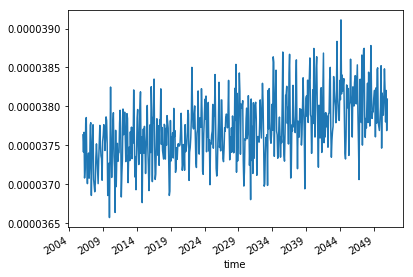

In [38]:
global_ave.plot()

The above plot show the global average for each month. The seasonal cycle is dominating the variability, so let's look at some averages in time to better examine the data.

## Working with time in xarray

One handy thing we can do with the time variable in xarray is look at values for given years or months.

Take a quick look at the time dimension again:

In [39]:
global_ave.time

<xarray.DataArray 'time' (time: 540)>
array(['2006-01-16T12:00:00.000000000', '2006-02-15T00:00:00.000000000',
       '2006-03-16T12:00:00.000000000', ..., '2050-10-16T12:00:00.000000000',
       '2050-11-16T00:00:00.000000000', '2050-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2006-01-16T12:00:00 2006-02-15 ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

Using xarray, you can output a list of the months for each time (not that the list of months should be very surprising to you, but this functionality will be more useful later).

You can also look at the year, day of the year (the middle of the month for this dataset, since they are monthly averages), or season for each time.

<span style="color:red">**Note the use of "[]" rather than "()" below.**</span> You can think of this as taking a **subset** of the `global_ave` xarray **metadata** that is just the month values of the `time` coordinate. 

In [40]:
global_ave['time.month']

<xarray.DataArray 'month' (time: 540)>
array([ 1,  2,  3, ..., 10, 11, 12])
Coordinates:
  * time     (time) datetime64[ns] 2006-01-16T12:00:00 2006-02-15 ...

In [41]:
global_ave['time.year']

<xarray.DataArray 'year' (time: 540)>
array([2006, 2006, 2006, ..., 2050, 2050, 2050])
Coordinates:
  * time     (time) datetime64[ns] 2006-01-16T12:00:00 2006-02-15 ...

In [42]:
global_ave['time.dayofyear']

<xarray.DataArray 'dayofyear' (time: 540)>
array([ 16,  46,  75, ..., 289, 320, 350])
Coordinates:
  * time     (time) datetime64[ns] 2006-01-16T12:00:00 2006-02-15 ...

In [43]:
global_ave['time.season']

<xarray.DataArray 'season' (time: 540)>
array(['DJF', 'DJF', 'MAM', ..., 'SON', 'SON', 'DJF'], dtype='<U3')
Coordinates:
  * time     (time) datetime64[ns] 2006-01-16T12:00:00 2006-02-15 ...

This functionality becomes really useful when we want to average over some set of points in the time series. For example, to average all the data from each year together (i.e. construct the **annual average**, we use `groupby('time.year')`. This "groups" all of the data according to the specified variable (in this case, the years), and then calculates the mean for each group separately.


In [44]:
# This just averages all of the values together.
global_ave.mean()

<xarray.DataArray ()>
array(3.77247e-05)

In [45]:
# This averages the values together for each year separately. 
annual_global_ave=global_ave.groupby('time.year').mean()

annual_global_ave

<xarray.DataArray (year: 45)>
array([3.738525e-05, 3.729756e-05, 3.736817e-05, 3.743373e-05, 3.742342e-05,
       3.747182e-05, 3.755334e-05, 3.749373e-05, 3.760005e-05, 3.744772e-05,
       3.763613e-05, 3.760230e-05, 3.752313e-05, 3.748688e-05, 3.750742e-05,
       3.752977e-05, 3.777164e-05, 3.771131e-05, 3.766943e-05, 3.764944e-05,
       3.767485e-05, 3.775383e-05, 3.771635e-05, 3.775884e-05, 3.762920e-05,
       3.765078e-05, 3.766845e-05, 3.770848e-05, 3.788812e-05, 3.773940e-05,
       3.786126e-05, 3.784562e-05, 3.781305e-05, 3.803902e-05, 3.800256e-05,
       3.789835e-05, 3.781364e-05, 3.812783e-05, 3.808846e-05, 3.805930e-05,
       3.806682e-05, 3.806283e-05, 3.812096e-05, 3.800461e-05, 3.805686e-05])
Coordinates:
  * year     (year) int64 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 ...

Without xarray, you would actually have to create a loop that cycles through each year, and then calculate the mean for each set of twelve months.  It would look something like this:

In [46]:
annual_glob_ave_2=np.zeros(45)
for i in range(45):
    annual_glob_ave_2[i]=np.mean(global_ave[i*12:i*12+12])
    
annual_glob_ave_2    

array([3.73852515e-05, 3.72975567e-05, 3.73681689e-05, 3.74337281e-05,
       3.74234214e-05, 3.74718232e-05, 3.75533365e-05, 3.74937290e-05,
       3.76000462e-05, 3.74477174e-05, 3.76361297e-05, 3.76023011e-05,
       3.75231278e-05, 3.74868820e-05, 3.75074179e-05, 3.75297654e-05,
       3.77716377e-05, 3.77113143e-05, 3.76694338e-05, 3.76494436e-05,
       3.76748464e-05, 3.77538333e-05, 3.77163508e-05, 3.77588367e-05,
       3.76291974e-05, 3.76507795e-05, 3.76684486e-05, 3.77084837e-05,
       3.78881205e-05, 3.77394029e-05, 3.78612641e-05, 3.78456175e-05,
       3.78130476e-05, 3.80390181e-05, 3.80025551e-05, 3.78983475e-05,
       3.78136405e-05, 3.81278271e-05, 3.80884550e-05, 3.80592989e-05,
       3.80668224e-05, 3.80628301e-05, 3.81209616e-05, 3.80046058e-05,
       3.80568560e-05])

This is more complicated, and we've lost the time coordinate data associated with the variable.  I almost had us start with this technique first, so you could really understand how much easier it is to use xarray. But just take my word on this one.

Let's plot the **time series** (for the first annual, global mean we calculated) and see how it looks now that we've averaged together the months in each year (thus removing the seasonal cycle).

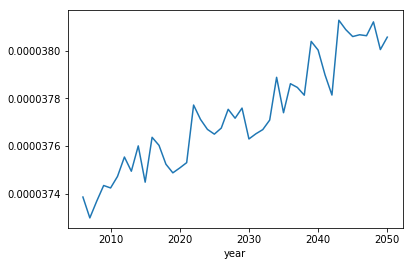

In [47]:
annual_global_ave.plot()

Alternately, we can go back to the global average time series data and calculate the **mean monthly** precipitation for each month (i.e., the **seasonal cycle**).

Note that we have to use the `global_ave` variable, not the `annual_global_ave`, which has already lost the information from the different months of the year.

In [48]:
month_averages = global_ave.groupby('time.month').mean()

In [49]:
month_averages

<xarray.DataArray (month: 12)>
array([3.778102e-05, 3.789501e-05, 3.784580e-05, 3.756236e-05, 3.771170e-05,
       3.798622e-05, 3.823636e-05, 3.774247e-05, 3.738319e-05, 3.731727e-05,
       3.753357e-05, 3.770149e-05])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

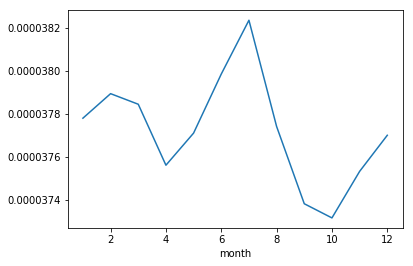

In [50]:
month_averages.plot()

The above plot shows the **seasonal cycle**.

## Using data from two files

We'd like to use the model simulation for the whole 21st Century (minus the first 5 years, which are not included in this simulation).  Read in the data and concatenate the two datasets together. Because they have all the same variables and dimensions, this is easy to do. xarray will use the `time` coordinate to determine which dataset comes first. If you have overlapping values of the `time` coordinate, you'd get an error.

In [51]:
# You already read in this first dataset above, so you don't need to do it again.
#ds = xr.open_dataset('/data/ATS_301/Data/pr_Amon_GISS-E2-H_rcp85_r1i1p1_200601-205012.nc')

ds2 = xr.open_dataset('/data/ATS_301/Data/pr_Amon_GISS-E2-H_rcp85_r1i1p1_205101-210012.nc')

big_ds=xr.concat([ds,ds2],dim='time')

In [52]:
big_ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 1140)
Coordinates:
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...
  * lon        (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 ...
  * time       (time) datetime64[ns] 2006-01-16T12:00:00 2006-02-15 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 0.0 31.0 31.0 59.0 59.0 90.0 90.0 120.0 ...
    lat_bnds   (time, lat, bnds) float64 -90.0 -88.0 -88.0 -86.0 -86.0 -84.0 ...
    lon_bnds   (time, lon, bnds) float64 0.0 2.5 2.5 5.0 5.0 7.5 7.5 10.0 ...
    pr         (time, lat, lon) float32 5.8141376e-07 5.8141376e-07 ...
Attributes:
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          rcp85
    source:                 GISS-E2-H-Eh135RCP85a Atmosphere: GISS-E2; Ocean: H
    model_id:               GISS-E2-H
    forcing:                GHG, LU, 

NOTE:  `time_average_pr` is used earlier in the lab.  The variable below uses the values from the new, combined data set.  Either is fine to use here.  You'll want to use this combined data set for your homework

In [ ]:
# Average over all times, for the combined data set.
time_ave_pr=??????

In [53]:
#
time_ave_pr=big_ds.pr.mean(dim='time')

In [54]:
time_ave_pr

<xarray.DataArray 'pr' (lat: 90, lon: 144)>
array([[1.005841e-06, 1.005841e-06, 1.005841e-06, ..., 1.005841e-06,
        1.005841e-06, 1.005841e-06],
       [1.779785e-06, 1.872967e-06, 2.041188e-06, ..., 1.978806e-06,
        1.873046e-06, 1.762133e-06],
       [2.739164e-06, 2.441769e-06, 2.300796e-06, ..., 3.726560e-06,
        3.403498e-06, 3.047092e-06],
       ...,
       [1.024036e-05, 1.022613e-05, 1.025832e-05, ..., 1.005310e-05,
        1.009153e-05, 1.020320e-05],
       [8.648450e-06, 8.677530e-06, 8.777150e-06, ..., 8.312340e-06,
        8.490418e-06, 8.498307e-06],
       [5.319625e-06, 5.319625e-06, 5.319625e-06, ..., 5.319625e-06,
        5.319625e-06, 5.319625e-06]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 ...

Plot the time-mean precip for the combined data set (lat-lon plot).

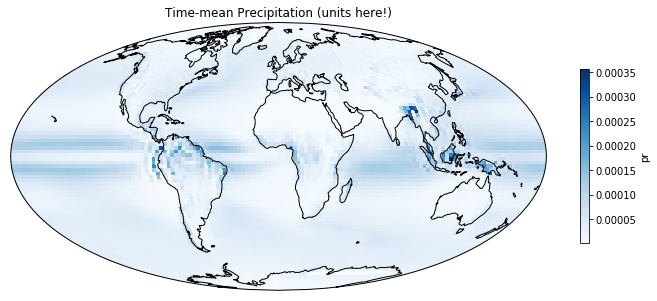

In [55]:
#
plt.figure(figsize=[12,8])
ax = plt.axes(projection=ccrs.Mollweide())
time_ave_pr.plot(ax=ax, transform=ccrs.PlateCarree(),\
                 cmap='Blues',cbar_kwargs={'shrink':0.4})
ax.coastlines()
plt.title('Time-mean Precipitation (units here!)')
plt.show()

To make the numbers easier to understand, we convert from kg m$^{-2}$ s$^{-1}$ to mm/day.

The density of water is approx 1000 kg m$^{-3}$.  So one kg m$^{-2}$ is 1/1000 m high, or 1 mm.  The number of seconds in a day is 60X60X24.

We then multiply this by the 2-D array before plotting.  (Note the `()` around this multiplication before plotting.)

In [56]:
num_sec_in_day=60*60*24

Text(0.5,1,'Time-mean Precipitation (mm/day)')

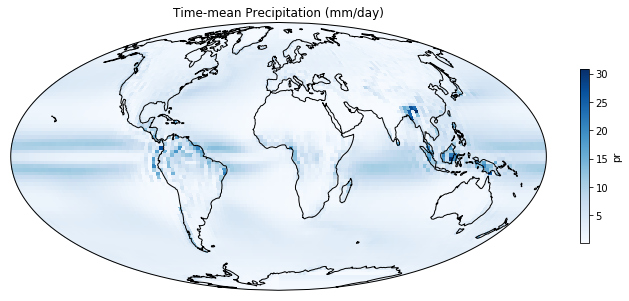

In [57]:
plt.figure(figsize=[12,8])
ax = plt.axes(projection=ccrs.Mollweide())
(num_sec_in_day*time_ave_pr).plot(ax=ax, \
                                  transform=ccrs.PlateCarree(),\
                                  cmap='Blues',\
                                  cbar_kwargs={'shrink':0.4})
ax.coastlines()
plt.title('Time-mean Precipitation (mm/day)')


## Subplots

We'd like to compare this figure to other plots.  However, if we plot everything individually, `plot` will pick a different range of values for the colors, which might not be the same for every plot.  To make everything consistent, we specify the `vmin` and `vmax` in the xarray `plot` function.  We'll use a minimum of 0 and a maximum of 35 (mm/day), since we expect some values larger than the time-mean in the previous plot.   

In [58]:
help(xr.plot.pcolormesh)

Help on function pcolormesh in module xarray.plot.plot:

pcolormesh(x, y, z, ax, infer_intervals=None, **kwargs)
    Pseudocolor plot of 2d DataArray
    
    Wraps :func:`matplotlib:matplotlib.pyplot.pcolormesh`
    
    
    Parameters
    ----------
    darray : DataArray
        Must be 2 dimensional, unless creating faceted plots
    x : string, optional
        Coordinate for x axis. If None use darray.dims[1]
    y : string, optional
        Coordinate for y axis. If None use darray.dims[0]
    figsize : tuple, optional
        A tuple (width, height) of the figure in inches.
        Mutually exclusive with ``size`` and ``ax``.
    aspect : scalar, optional
        Aspect ratio of plot, so that ``aspect * size`` gives the width in
        inches. Only used if a ``size`` is provided.
    size : scalar, optional
        If provided, create a new figure for the plot with the given size.
        Height (in inches) of each plot. See also: ``aspect``.
    ax : matplotlib axes object, 

Text(0.5,1,'Time-mean Precipitation (mm/day)')

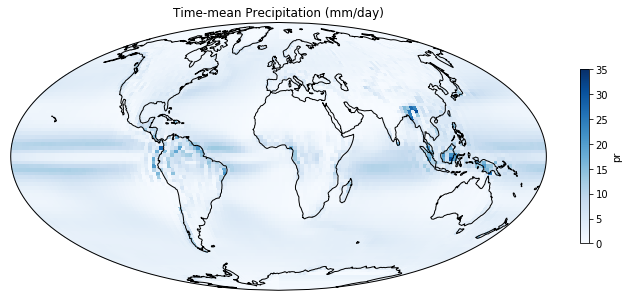

In [59]:
plt.figure(figsize=[12,8])
ax = plt.axes(projection=ccrs.Mollweide())
(num_sec_in_day*time_ave_pr).plot(ax=ax, vmin=0, vmax=35,\
                                  transform=ccrs.PlateCarree(),\
                                  cmap='Blues',cbar_kwargs={'shrink':0.4})
ax.coastlines()
plt.title('Time-mean Precipitation (mm/day)')

Place plots next to each other for easier comparison using `subplot`. The first number in the `plt.subplot` function indicates the number of rows, the second the number of columns.  The third number indicates which location this particular subplot corresponds to. Note that the first plot corresponds to ax1, the left side, and the second to ax2, on the right.

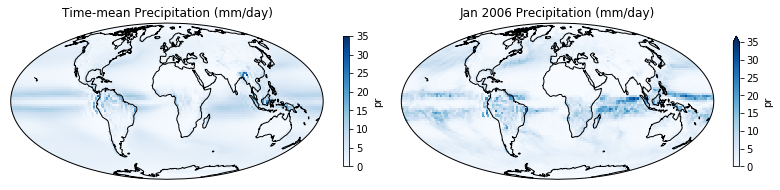

In [60]:
plt.figure(figsize=[14,6])

# Make the subplots a little closer horizontally.
plt.subplots_adjust(wspace=0)

# Create the first plot

ax1 = plt.subplot(1,2,1, projection=ccrs.Mollweide())
(num_sec_in_day*time_ave_pr).plot(ax=ax1, vmin=0,vmax=35, \
                                    transform=ccrs.PlateCarree(), \
                                    cmap='Blues',\
                                    cbar_kwargs={'shrink':0.4})
ax1.coastlines()
plt.title('Time-mean Precipitation (mm/day)')

# Create the second plot

ax2 = plt.subplot(1,2,2, projection=ccrs.Mollweide())
(num_sec_in_day*ds.pr[0,:,:]).plot(ax=ax2, vmin=0,vmax=35, \
                                   transform=ccrs.PlateCarree(),cmap='Blues',\
                                   cbar_kwargs={'shrink':0.4})
ax2.coastlines()
plt.title('Jan 2006 Precipitation (mm/day)')

plt.show()


Move the colorbars to the bottom so we have more room horizontally.

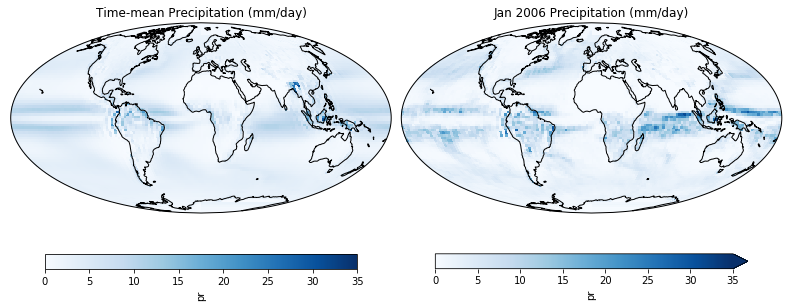

In [61]:
plt.figure(figsize=[14,5])

# Make the subplots a little closer horizontally.
plt.subplots_adjust(wspace=0)

# Create the first plot

ax1 = plt.subplot(1,2,1, projection=ccrs.Mollweide())
(num_sec_in_day*time_ave_pr).plot(ax=ax1, vmin=0,vmax=35, \
                                    transform=ccrs.PlateCarree(),\
                                    cmap='Blues',\
                                    cbar_kwargs={'orientation':'horizontal','shrink':0.8})
ax1.coastlines()
plt.title('Time-mean Precipitation (mm/day)')

# Create the second plot


ax2 = plt.subplot(1,2,2, projection=ccrs.Mollweide())
(num_sec_in_day*ds.pr[0,:,:]).plot(ax=ax2, vmin=0,vmax=35, \
                                   transform=ccrs.PlateCarree(),cmap='Blues',\
                                   cbar_kwargs={'orientation':'horizontal','shrink':0.8})
ax2.coastlines()
plt.title('Jan 2006 Precipitation (mm/day)')


plt.show()


## Extracting data for a particular month

xarray also allows us to easily extract the data that corresponds to a particular month, year, season, etc.  Here, I'm extracting all the pr data that corresponds to a month of 1 (i.e., Jan), and then averaging over all of the Januarys.

This is simpler than what you would need to do if you didn't have xarray. 

(Alternately, you can calculate the mean for each month using the `groupby` function, and then use subscripting to extract the result for the month you want.)

In [62]:
big_ds.pr['time.month']

<xarray.DataArray 'month' (time: 1140)>
array([ 1,  2,  3, ..., 10, 11, 12])
Coordinates:
  * time     (time) datetime64[ns] 2006-01-16T12:00:00 2006-02-15 ...

In [63]:
big_ds.pr['time.month'] == 1

<xarray.DataArray 'month' (time: 1140)>
array([ True, False, False, ..., False, False, False])
Coordinates:
  * time     (time) datetime64[ns] 2006-01-16T12:00:00 2006-02-15 ...

In [64]:
big_ds.pr[big_ds.pr['time.month'] == 1]

<xarray.DataArray 'pr' (time: 95, lat: 90, lon: 144)>
array([[[5.814138e-07, 5.814138e-07, ..., 5.814138e-07, 5.814138e-07],
        [9.640635e-07, 9.544301e-07, ..., 9.035524e-07, 9.400576e-07],
        ...,
        [3.047879e-06, 3.144752e-06, ..., 2.856650e-06, 2.943590e-06],
        [2.411085e-06, 2.411085e-06, ..., 2.411085e-06, 2.411085e-06]],

       [[7.136202e-07, 7.136202e-07, ..., 7.136202e-07, 7.136202e-07],
        [1.057674e-06, 1.106978e-06, ..., 1.051401e-06, 9.928526e-07],
        ...,
        [5.732227e-06, 5.748788e-06, ..., 5.616637e-06, 5.815992e-06],
        [3.866685e-06, 3.866685e-06, ..., 3.866685e-06, 3.866685e-06]],

       ...,

       [[1.008673e-06, 1.008673e-06, ..., 1.008673e-06, 1.008673e-06],
        [1.479102e-06, 1.679945e-06, ..., 1.646393e-06, 1.398821e-06],
        ...,
        [7.257598e-06, 6.786497e-06, ..., 7.078496e-06, 6.592250e-06],
        [5.625016e-06, 5.625016e-06, ..., 5.625016e-06, 5.625016e-06]],

       [[1.429521e-06, 1.429521e-06,

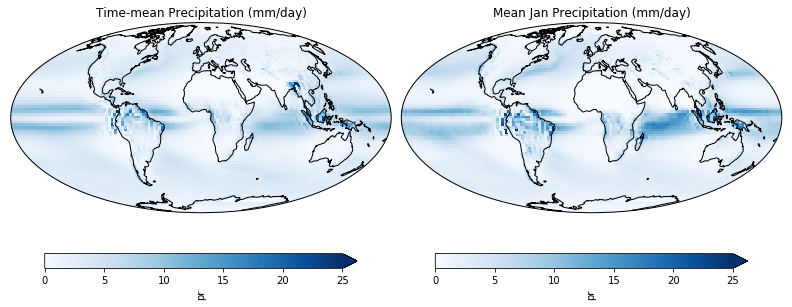

In [66]:
# Note the use of double equal sign here.

Jan_ave_pr=big_ds.pr[big_ds.pr['time.month'] == 1].mean(dim='time')


plt.figure(figsize=[14,5])

# Make the subplots a little closer horizontally.
plt.subplots_adjust(wspace=0)

ax1 = plt.subplot(1,2,1, projection=ccrs.Mollweide())
(num_sec_in_day*time_ave_pr).plot(ax=ax1, vmin=0, vmax=25, \
                                    transform=ccrs.PlateCarree(),cmap='Blues',\
                                    cbar_kwargs={'orientation':'horizontal','shrink':0.8})
ax1.coastlines()
plt.title('Time-mean Precipitation (mm/day)')


ax2 = plt.subplot(1,2,2, projection=ccrs.Mollweide())
(num_sec_in_day*Jan_ave_pr).plot(ax=ax2, vmin=0,vmax=25, \
                                 transform=ccrs.PlateCarree(),cmap='Blues',\
                                 cbar_kwargs={'orientation':'horizontal','shrink':0.8})
ax2.coastlines()
plt.title('Mean Jan Precipitation (mm/day)')


plt.show()


Plot the difference between two lat-lon plots, and the difference as the fractional change. This is just an example.  In your homework, you will need to compare the differences between averages over different sets of years.

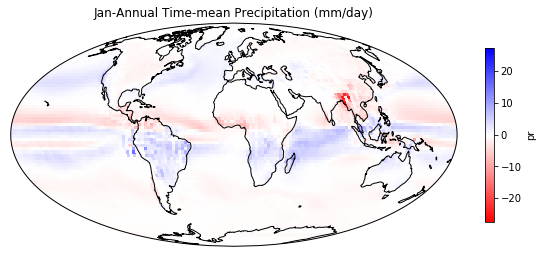

In [67]:
plt.figure(figsize=[10,8])
ax = plt.axes(projection=ccrs.Mollweide())
(num_sec_in_day*(Jan_ave_pr-time_ave_pr)).plot(ax=ax, \
                            transform=ccrs.PlateCarree(),\
                            cmap='bwr_r',cbar_kwargs={'shrink':0.4})
ax.coastlines()
plt.title('Jan-Annual Time-mean Precipitation (mm/day)')
plt.show()

Text(0.5,1,'Jan-Annual Time-mean Precipitation (fraction)')

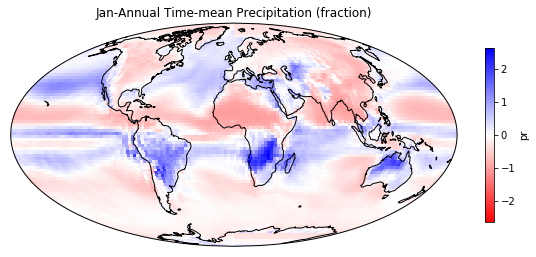

In [68]:
frac_diff=(Jan_ave_pr-time_ave_pr)/time_ave_pr

plt.figure(figsize=[10,8])
ax = plt.axes(projection=ccrs.Mollweide())
frac_diff.plot(ax=ax, transform=ccrs.PlateCarree(),cmap='bwr_r',\
               cbar_kwargs={'shrink':0.4})
ax.coastlines()
plt.title('Jan-Annual Time-mean Precipitation (fraction)')

In [69]:
np.min(frac_diff)

<xarray.DataArray 'pr' ()>
array(-0.997371, dtype=float32)

In [70]:
np.max(frac_diff)

<xarray.DataArray 'pr' ()>
array(2.629597, dtype=float32)